In [103]:
from keras.datasets import cifar10
from keras.datasets import mnist
from keras.utils import to_categorical

In [130]:
(train_images, train_labels),(test_images,test_labels) = cifar10.load_data()

In [131]:
print(len(train_images))
print(len(test_images))
print(train_images[0].shape)

50000
10000
(32, 32, 3)


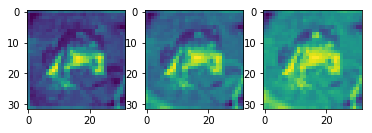

In [137]:
import matplotlib.pyplot as plt
%matplotlib inline
_, axarr = plt.subplots(1,3)
axarr[0].imshow(train_images[0,:,:,2])
axarr[1].imshow(train_images[0,:,:,1])
axarr[2].imshow(train_images[0,:,:,0])

In [133]:
train_labels_categorical = to_categorical(train_labels)
test_labels_categorical = to_categorical(test_labels)

In [625]:
train_images_norm = train_images/255.
test_images_norm = test_images/255.

In [161]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(32,(3,3), padding="same",activation='relu',input_shape=(32,32,3)))
model.add(layers.Conv2D(32,(3,3), padding="same", activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64,(3,3), padding="same", activation='relu'))
model.add(layers.Conv2D(64,(3,3), padding="same", activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128,(3,3), padding="same", activation='relu'))
model.add(layers.Conv2D(128,(3,3),padding="same", activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation="softmax"))

In [162]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_70 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 8, 8, 128)         73856     
__________

In [163]:
from keras import optimizers
opt = optimizers.RMSprop(lr=0.001)
model.compile(
  loss="categorical_crossentropy",
  optimizer=opt,
  metrics=['acc']
)

In [ ]:
history = model.fit(
  x=train_images_norm,
  y=train_labels_categorical,
  epochs=30,
  batch_size = 64,
  validation_split = 0.2
)

In [165]:
model.save('Attempt_1_4.h5')

In [4]:
hist = history.history

acc = hist['acc']
val_acc = hist['val_acc']

loss = hist['loss']
val_loss = hist['val_loss']

epochs = range(1,len(acc)+1)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


NameError: name 'history' is not defined

Train Accuracy: 
0.964675
Validation Acuracy: 
0.76


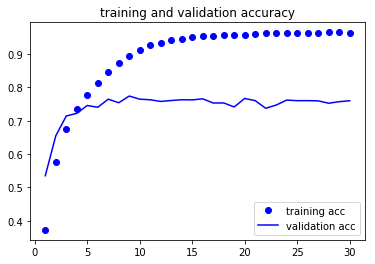

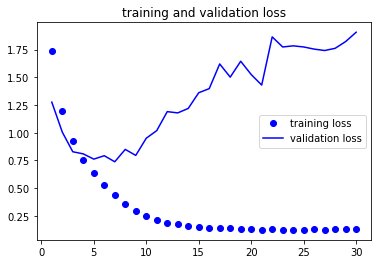

In [635]:
plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

# training and validation loss

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

print("Train Accuracy: ")
print(hist['acc'][-1])
print("Validation Acuracy: ")
print(hist['val_acc'][-1])
plt.show()

In [637]:
loss, acc = model.evaluate(
    x=test_images,
    y=test_labels_categorical
)

10000/10000 [==============================] - 16s 2ms/step


In [638]:
print("Loss: ")
print(loss)
print("Accuracy: ")
print(acc)

Loss: 
6.326229746246338
Accuracy: 
0.6058


In [609]:
import numpy as np
import tensorflow as tf

model = load_model('Attempt_1_4.h5')

In [2]:
def get_examples(start,end):
    class_names = ['airplan', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    numImages = np.arange(start,end)
    predictions = []
    categories = []
    for i in numImages:
        #prediction from model for first 5 images
        predictions.append(np.argmax(model.predict(x=test_images_norm[i].reshape(1,32,32,3))))
        categories.append(class_names[predictions[-1]])

    #create subplots
    (f, axs) = plt.subplots(1, len(predictions), sharey=True)
    f.set_figheight(10)
    f.set_figwidth(20)

    guessNumber = 0
    for i in numImages:
        guess = categories[guessNumber]
        actual = class_names[test_labels[i][0]]
        actual = actual
        xpos = (10-len("Actual : "+ actual)/2)

        if(actual == guess):
            color = "green"
        else:
            color="red"

        axs[guessNumber].imshow(test_images[i])
        axs[guessNumber].set_title("Guess : " + categories[guessNumber],color=color)

        axs[guessNumber].text(xpos,40, "Actual : " + actual,color=color)
        guessNumber += 1
    f.show()

In [3]:
get_examples(100,110)


NameError: name 'np' is not defined